# Basic Probability

In [3]:
!pip install mxnet

import mxnet as mx
from mxnet import nd
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Let's define a discrete distribution over 6 outcomes and sample from it.

In [4]:
probabilities = nd.ones(6) / 6
nd.random.multinomial(probabilities)


[3]
<NDArray 1 @cpu(0)>

Let's draw from it multiple times.

In [5]:
print(nd.random.multinomial(probabilities, shape=(10)))
print(nd.random.multinomial(probabilities, shape=(5,10)))


[3 4 5 3 5 3 5 2 3 3]
<NDArray 10 @cpu(0)>

[[2 2 1 5 0 5 1 2 2 4]
 [4 3 2 3 2 5 5 0 2 0]
 [3 0 2 4 5 4 0 5 5 5]
 [2 4 4 2 3 4 4 0 4 3]
 [3 0 3 5 4 3 0 2 2 1]]
<NDArray 5x10 @cpu(0)>


Let's see what happens for 1000 samples.

In [6]:
rolls = nd.random.multinomial(probabilities, shape=(1000))
counts = nd.zeros((6,1000))
totals = nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals

To start, we can inspect the final tally at the end of $1000$ rolls.

In [7]:
totals / 1000


[0.167 0.168 0.175 0.159 0.158 0.173]
<NDArray 6 @cpu(0)>

Let's look at the counts.

In [8]:
counts


[[  0.   0.   0. ... 165. 166. 167.]
 [  1.   1.   1. ... 168. 168. 168.]
 [  0.   0.   0. ... 175. 175. 175.]
 [  0.   0.   0. ... 159. 159. 159.]
 [  0.   1.   2. ... 158. 158. 158.]
 [  0.   0.   0. ... 173. 173. 173.]]
<NDArray 6x1000 @cpu(0)>

Normalizing by the number of tosses, we get:

In [9]:
x = nd.arange(1000).reshape((1,1000)) + 1
estimates = counts / x
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])


[0. 1. 0. 0. 0. 0.]
<NDArray 6 @cpu(0)>

[0.  0.5 0.  0.  0.5 0. ]
<NDArray 6 @cpu(0)>

[0.1980198  0.15841584 0.17821783 0.18811882 0.12871288 0.14851485]
<NDArray 6 @cpu(0)>


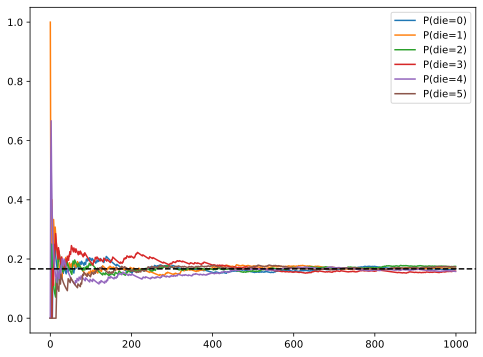

In [10]:
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(estimates[i, :].asnumpy(), label=("P(die=" + str(i) +")"))

plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()   
plt.show()